# Progress 4: Model Development

---

**Course:** SECB3203 Programming for Bioinformatics  
**Project:** Early Detection of Parkinson's Disease Using Machine Learning  
**Section:** 02

---

**Group Members:**

| Name | Matric Number |
|------|---------------|
| MUHAMMAD AMIRUN IRFAN BIN SAMSUL SHAH | A23CS0121 |
| MUHAMMAD HAFIZ BIN MOHD SHAHARUDDIN | A23CS0130 |
| MUHAMMAD ZAFRIL IHSAN BIN MOHAMAD NASIR | A23CS0304 |

---

## Table of Contents

1. Introduction
2. Importing Libraries and Dataset
3. Data Preparation
4. Linear Regression Analysis
5. Polynomial Regression and Pipelines
6. Classification Model Development
7. Model Evaluation Using Visualization
8. R-squared and MSE for In-Sample Evaluation
9. Prediction and Decision Making
10. Summary and Conclusion

---
## 1. Introduction
---

Model development is a critical phase in the machine learning pipeline where we construct predictive models using the preprocessed dataset. This progress report documents the development of multiple machine learning models for classifying Parkinson's disease based on voice measurements.

The objectives of this progress are:
1. To demonstrate linear and polynomial regression techniques for understanding feature relationships
2. To develop classification models including Logistic Regression, Support Vector Machine (SVM), and Random Forest
3. To create pipelines for streamlined model development
4. To evaluate models using appropriate metrics including R-squared, MSE, and classification accuracy
5. To visualize model performance and make predictions on the dataset

Although Parkinson's disease detection is fundamentally a classification problem, we include regression analysis as required by the course syllabus to demonstrate understanding of these fundamental techniques.

---
## 2. Importing Libraries and Dataset
---

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Scikit-learn imports for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Scikit-learn imports for regression
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression

# Scikit-learn imports for classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Scikit-learn imports for pipelines
from sklearn.pipeline import Pipeline

# Scikit-learn imports for evaluation
from sklearn.metrics import (
    mean_squared_error, r2_score, mean_absolute_error,
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score, roc_curve, auc
)

# Suppress warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries imported successfully.")

All libraries imported successfully.


In [2]:
# Load the dataset
df = pd.read_csv('Parkinsson_disease.csv')

# Remove the 'name' column
df = df.drop(columns=['name'])

print("Dataset loaded successfully.")
print(f"Dataset shape: {df.shape}")
print(f"\nFeatures: {df.shape[1] - 1}")
print(f"Target variable: status (0 = Healthy, 1 = Parkinson's)")

Dataset loaded successfully.
Dataset shape: (195, 23)

Features: 22
Target variable: status (0 = Healthy, 1 = Parkinson's)


---
## 3. Data Preparation
---

Before developing models, we need to prepare the data by separating features and target, splitting into training and testing sets, and applying feature scaling.

### 3.1 Separating Features and Target

In [3]:
# Separate features (X) and target (y)
X = df.drop(columns=['status'])
y = df['status']

print("Features and Target Separated:")
print("="*50)
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nFeature names: {list(X.columns)}")

Features and Target Separated:
Features (X) shape: (195, 22)
Target (y) shape: (195,)

Feature names: ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


### 3.2 Train-Test Split

We split the data into training set (80%) and testing set (20%). The training set is used to train the model, while the testing set is used to evaluate its performance on unseen data.

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=42,    # For reproducibility
    stratify=y          # Maintain class distribution
)

print("Train-Test Split Completed:")
print("="*50)
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nTraining set class distribution:")
print(f"  - Parkinson's (1): {sum(y_train == 1)} ({sum(y_train == 1)/len(y_train)*100:.1f}%)")
print(f"  - Healthy (0): {sum(y_train == 0)} ({sum(y_train == 0)/len(y_train)*100:.1f}%)")

print(f"\nTesting set class distribution:")
print(f"  - Parkinson's (1): {sum(y_test == 1)} ({sum(y_test == 1)/len(y_test)*100:.1f}%)")
print(f"  - Healthy (0): {sum(y_test == 0)} ({sum(y_test == 0)/len(y_test)*100:.1f}%)")

Train-Test Split Completed:
Training set size: 156 samples (80.0%)
Testing set size: 39 samples (20.0%)

Training set class distribution:
  - Parkinson's (1): 118 (75.6%)
  - Healthy (0): 38 (24.4%)

Testing set class distribution:
  - Parkinson's (1): 29 (74.4%)
  - Healthy (0): 10 (25.6%)


### 3.3 Feature Scaling

Feature scaling ensures all features are on the same scale, which is important for many machine learning algorithms.

In [5]:
# Apply Standard Scaling
scaler = StandardScaler()

# Fit on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Feature Scaling Completed:")
print("="*50)
print("\nScaled training data statistics:")
print(f"Mean (should be ~0): {X_train_scaled.mean().mean():.6f}")
print(f"Std (should be ~1): {X_train_scaled.std().mean():.4f}")

Feature Scaling Completed:

Scaled training data statistics:
Mean (should be ~0): -0.000000
Std (should be ~1): 1.0032


---
## 4. Linear Regression Analysis
---

Although our primary task is classification, we demonstrate linear regression as required by the syllabus. We will use linear regression to model the relationship between individual features and the target variable, and to understand which features have the strongest linear relationship with Parkinson's disease status.

### 4.1 Simple Linear Regression

Simple linear regression models the relationship between a single feature and the target variable.

In [6]:
# Simple Linear Regression with the most correlated feature
# Based on EDA, 'spread1' has the highest correlation with status

# Select single feature
feature_name = 'spread1'
X_single_train = X_train_scaled[[feature_name]]
X_single_test = X_test_scaled[[feature_name]]

# Create and train the model
simple_lr = LinearRegression()
simple_lr.fit(X_single_train, y_train)

# Make predictions
y_train_pred_simple = simple_lr.predict(X_single_train)
y_test_pred_simple = simple_lr.predict(X_single_test)

# Calculate metrics
train_r2_simple = r2_score(y_train, y_train_pred_simple)
test_r2_simple = r2_score(y_test, y_test_pred_simple)
train_mse_simple = mean_squared_error(y_train, y_train_pred_simple)
test_mse_simple = mean_squared_error(y_test, y_test_pred_simple)

print("Simple Linear Regression Results:")
print("="*50)
print(f"Feature used: {feature_name}")
print(f"\nModel coefficients:")
print(f"  - Intercept (b0): {simple_lr.intercept_:.4f}")
print(f"  - Slope (b1): {simple_lr.coef_[0]:.4f}")
print(f"\nEquation: status = {simple_lr.intercept_:.4f} + {simple_lr.coef_[0]:.4f} * {feature_name}")
print(f"\nTraining Set Performance:")
print(f"  - R-squared: {train_r2_simple:.4f}")
print(f"  - MSE: {train_mse_simple:.4f}")
print(f"\nTesting Set Performance:")
print(f"  - R-squared: {test_r2_simple:.4f}")
print(f"  - MSE: {test_mse_simple:.4f}")

Simple Linear Regression Results:
Feature used: spread1

Model coefficients:
  - Intercept (b0): 0.7564
  - Slope (b1): 0.2454

Equation: status = 0.7564 + 0.2454 * spread1

Training Set Performance:
  - R-squared: 0.3268
  - MSE: 0.1240

Testing Set Performance:
  - R-squared: 0.2880
  - MSE: 0.1358


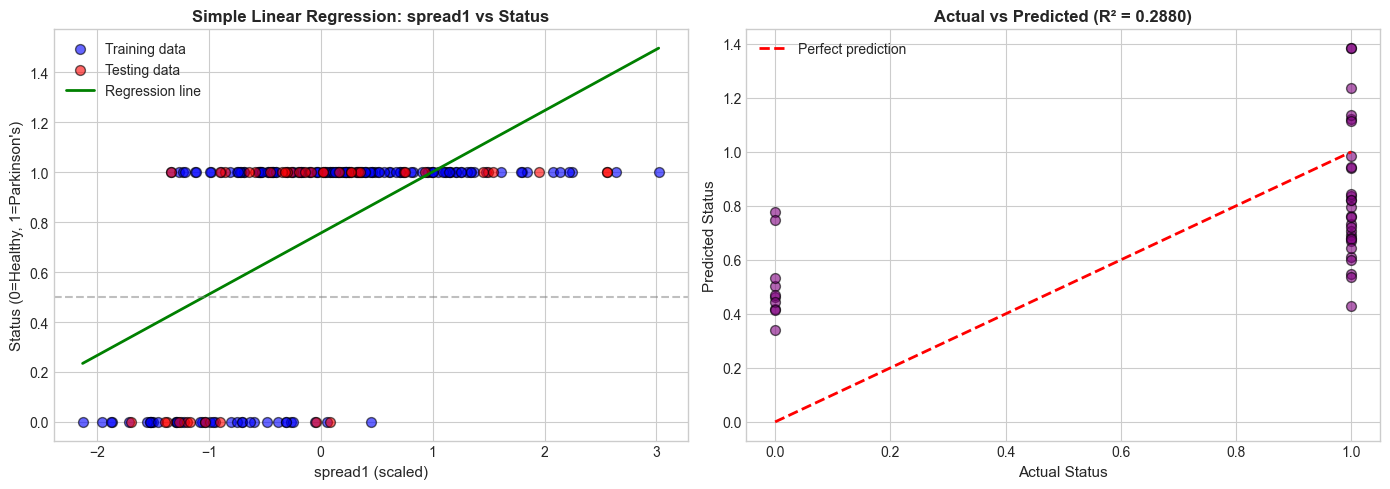

Figure saved: Model_01_simple_linear_regression.png


In [7]:
# Visualize Simple Linear Regression
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Scatter plot with regression line
ax1 = axes[0]
ax1.scatter(X_single_train, y_train, alpha=0.6, c='blue', label='Training data', edgecolors='black', s=50)
ax1.scatter(X_single_test, y_test, alpha=0.6, c='red', label='Testing data', edgecolors='black', s=50)

# Plot regression line
x_line = np.linspace(X_single_train.min().values[0], X_single_train.max().values[0], 100)
y_line = simple_lr.intercept_ + simple_lr.coef_[0] * x_line
ax1.plot(x_line, y_line, 'g-', linewidth=2, label='Regression line')

ax1.set_xlabel(f'{feature_name} (scaled)', fontsize=11)
ax1.set_ylabel('Status (0=Healthy, 1=Parkinson\'s)', fontsize=11)
ax1.set_title(f'Simple Linear Regression: {feature_name} vs Status', fontsize=12, fontweight='bold')
ax1.legend()
ax1.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Decision boundary')

# Plot 2: Actual vs Predicted
ax2 = axes[1]
ax2.scatter(y_test, y_test_pred_simple, alpha=0.6, c='purple', edgecolors='black', s=50)
ax2.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Perfect prediction')
ax2.set_xlabel('Actual Status', fontsize=11)
ax2.set_ylabel('Predicted Status', fontsize=11)
ax2.set_title(f'Actual vs Predicted (R² = {test_r2_simple:.4f})', fontsize=12, fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.savefig('Model_01_simple_linear_regression.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: Model_01_simple_linear_regression.png")

### 4.2 Multiple Linear Regression

Multiple linear regression uses multiple features to predict the target variable.

In [8]:
# Multiple Linear Regression with all features
multiple_lr = LinearRegression()
multiple_lr.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_multi = multiple_lr.predict(X_train_scaled)
y_test_pred_multi = multiple_lr.predict(X_test_scaled)

# Calculate metrics
train_r2_multi = r2_score(y_train, y_train_pred_multi)
test_r2_multi = r2_score(y_test, y_test_pred_multi)
train_mse_multi = mean_squared_error(y_train, y_train_pred_multi)
test_mse_multi = mean_squared_error(y_test, y_test_pred_multi)

print("Multiple Linear Regression Results:")
print("="*50)
print(f"Number of features used: {X_train_scaled.shape[1]}")
print(f"\nModel Intercept: {multiple_lr.intercept_:.4f}")
print(f"\nFeature Coefficients:")
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': multiple_lr.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print(coef_df.to_string(index=False))

Multiple Linear Regression Results:
Number of features used: 22

Model Intercept: 0.7564

Feature Coefficients:
         Feature  Coefficient
    Shimmer:APQ3   -27.905447
     Shimmer:DDA    27.781989
        MDVP:RAP     4.948160
      Jitter:DDP    -4.162491
  MDVP:Jitter(%)    -0.761502
    MDVP:Shimmer     0.381025
    Shimmer:APQ5    -0.340080
MDVP:Shimmer(dB)     0.218685
         spread1     0.189170
             NHR    -0.107145
            RPDE    -0.102413
             PPE     0.094757
MDVP:Jitter(Abs)    -0.085747
         spread2     0.080155
    MDVP:Flo(Hz)    -0.070079
             HNR    -0.064772
        MDVP:PPQ    -0.063633
     MDVP:Fo(Hz)    -0.059059
        MDVP:APQ    -0.057946
    MDVP:Fhi(Hz)    -0.030631
             DFA    -0.014751
              D2     0.013710


In [9]:
# Performance comparison
print("\nMultiple Linear Regression Performance:")
print("="*50)
print(f"Training Set:")
print(f"  - R-squared: {train_r2_multi:.4f}")
print(f"  - MSE: {train_mse_multi:.4f}")
print(f"  - RMSE: {np.sqrt(train_mse_multi):.4f}")
print(f"\nTesting Set:")
print(f"  - R-squared: {test_r2_multi:.4f}")
print(f"  - MSE: {test_mse_multi:.4f}")
print(f"  - RMSE: {np.sqrt(test_mse_multi):.4f}")

print(f"\nComparison with Simple Linear Regression:")
print(f"  Simple LR R² (test): {test_r2_simple:.4f}")
print(f"  Multiple LR R² (test): {test_r2_multi:.4f}")
print(f"  Improvement: {(test_r2_multi - test_r2_simple)*100:.2f}%")


Multiple Linear Regression Performance:
Training Set:
  - R-squared: 0.4769
  - MSE: 0.0964
  - RMSE: 0.3104

Testing Set:
  - R-squared: 0.4907
  - MSE: 0.0971
  - RMSE: 0.3116

Comparison with Simple Linear Regression:
  Simple LR R² (test): 0.2880
  Multiple LR R² (test): 0.4907
  Improvement: 20.28%


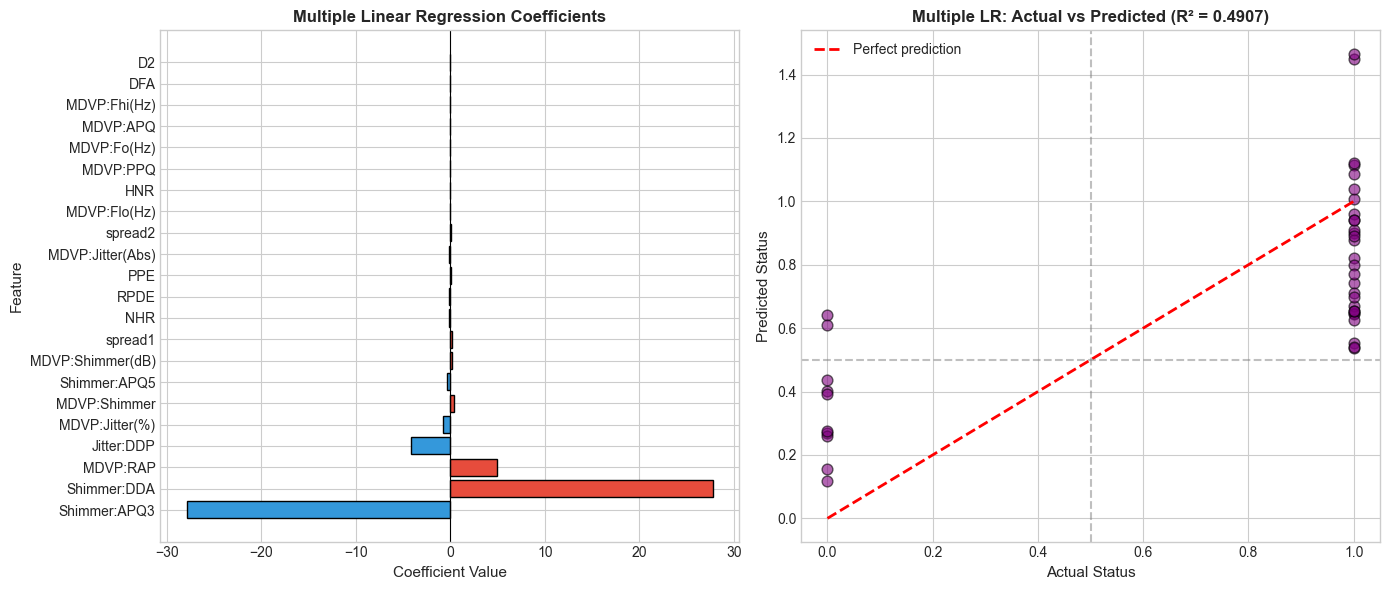

Figure saved: Model_02_multiple_linear_regression.png


In [10]:
# Visualize Multiple Linear Regression coefficients
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Feature coefficients
ax1 = axes[0]
colors = ['#e74c3c' if c > 0 else '#3498db' for c in coef_df['Coefficient']]
bars = ax1.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, edgecolor='black')
ax1.set_xlabel('Coefficient Value', fontsize=11)
ax1.set_ylabel('Feature', fontsize=11)
ax1.set_title('Multiple Linear Regression Coefficients', fontsize=12, fontweight='bold')
ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.8)

# Plot 2: Actual vs Predicted
ax2 = axes[1]
ax2.scatter(y_test, y_test_pred_multi, alpha=0.6, c='purple', edgecolors='black', s=60)
ax2.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Perfect prediction')
ax2.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
ax2.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)
ax2.set_xlabel('Actual Status', fontsize=11)
ax2.set_ylabel('Predicted Status', fontsize=11)
ax2.set_title(f'Multiple LR: Actual vs Predicted (R² = {test_r2_multi:.4f})', fontsize=12, fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.savefig('Model_02_multiple_linear_regression.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: Model_02_multiple_linear_regression.png")

---
## 5. Polynomial Regression and Pipelines
---

Polynomial regression extends linear regression by adding polynomial terms, allowing the model to capture non-linear relationships. Pipelines help streamline the preprocessing and modeling steps.

### 5.1 Polynomial Regression

In [11]:
# Polynomial Regression with single feature
feature_name = 'spread1'
X_single_train = X_train_scaled[[feature_name]].values
X_single_test = X_test_scaled[[feature_name]].values

# Test different polynomial degrees
degrees = [1, 2, 3, 4, 5]
results = []

print("Polynomial Regression Results:")
print("="*60)
print(f"Feature: {feature_name}")
print(f"\n{'Degree':<10}{'Train R²':<15}{'Test R²':<15}{'Train MSE':<15}{'Test MSE':<15}")
print("-"*70)

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_single_train)
    X_test_poly = poly.transform(X_single_test)
    
    # Train model
    poly_lr = LinearRegression()
    poly_lr.fit(X_train_poly, y_train)
    
    # Predictions
    y_train_pred = poly_lr.predict(X_train_poly)
    y_test_pred = poly_lr.predict(X_test_poly)
    
    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    results.append({
        'Degree': degree,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Train_MSE': train_mse,
        'Test_MSE': test_mse,
        'Model': poly_lr,
        'Poly': poly
    })
    
    print(f"{degree:<10}{train_r2:<15.4f}{test_r2:<15.4f}{train_mse:<15.4f}{test_mse:<15.4f}")

# Find best degree based on test R²
best_result = max(results, key=lambda x: x['Test_R2'])
print(f"\nBest polynomial degree: {best_result['Degree']} (Test R² = {best_result['Test_R2']:.4f})")

Polynomial Regression Results:
Feature: spread1

Degree    Train R²       Test R²        Train MSE      Test MSE       
----------------------------------------------------------------------
1         0.3268         0.2880         0.1240         0.1358         
2         0.4202         0.4313         0.1068         0.1084         
3         0.4226         0.4402         0.1064         0.1067         
4         0.4251         0.4433         0.1059         0.1061         
5         0.4263         0.4511         0.1057         0.1047         

Best polynomial degree: 5 (Test R² = 0.4511)


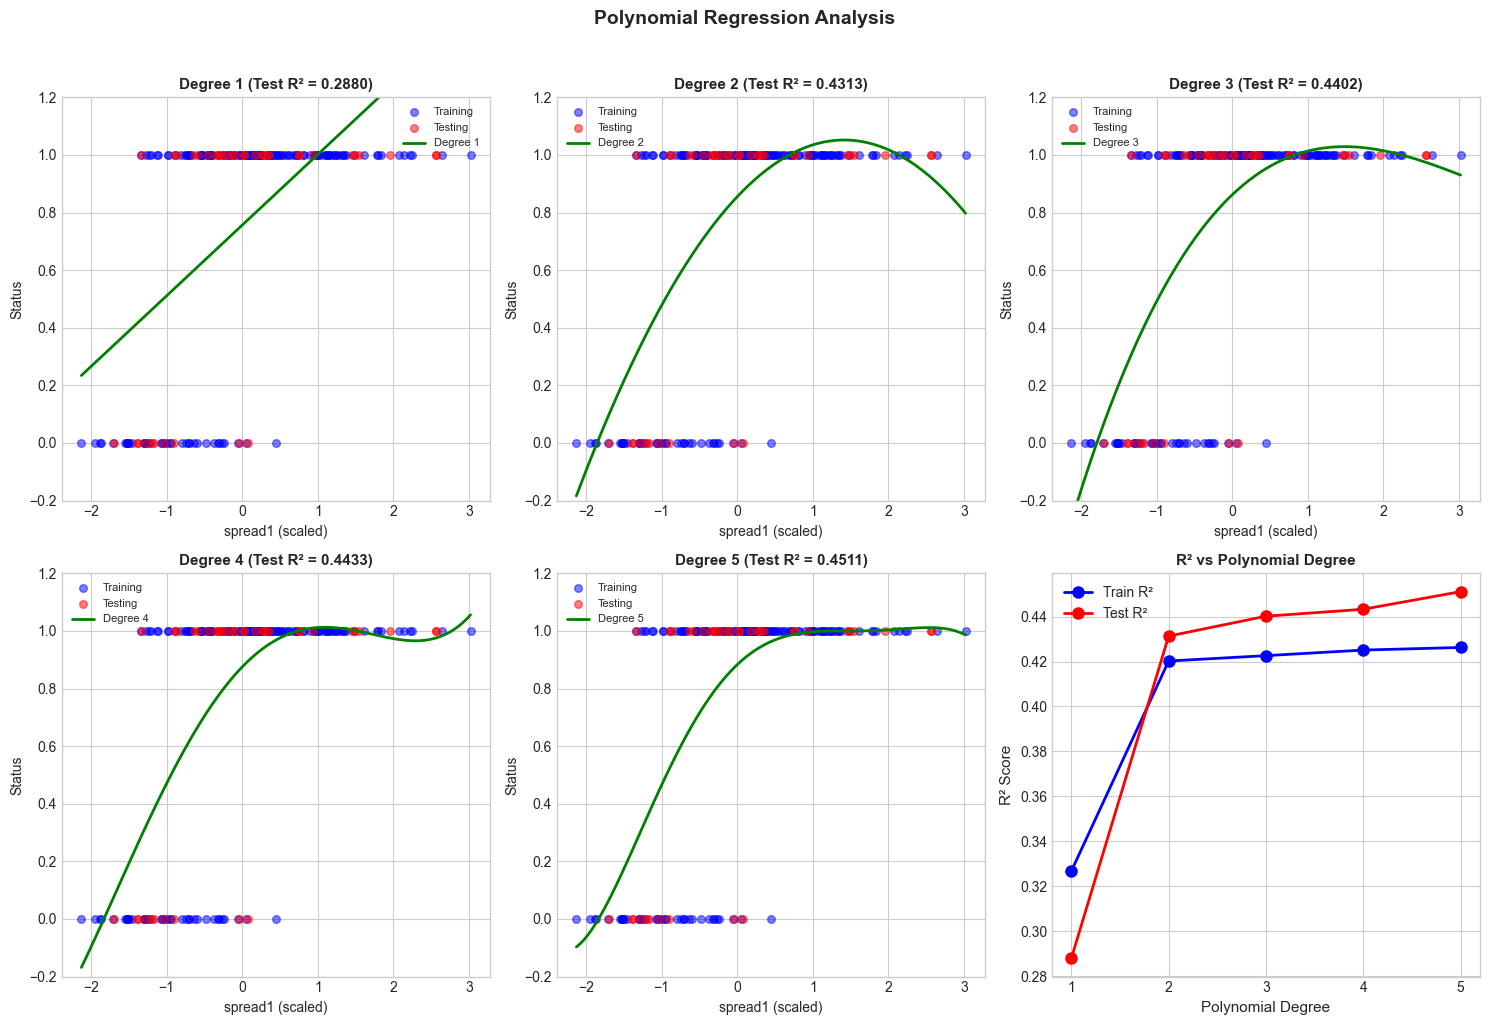

Figure saved: Model_03_polynomial_regression.png


In [12]:
# Visualize polynomial regression for different degrees
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

x_plot = np.linspace(X_single_train.min(), X_single_train.max(), 100).reshape(-1, 1)

for i, result in enumerate(results):
    ax = axes[i]
    degree = result['Degree']
    model = result['Model']
    poly = result['Poly']
    
    # Plot data points
    ax.scatter(X_single_train, y_train, alpha=0.5, c='blue', s=30, label='Training')
    ax.scatter(X_single_test, y_test, alpha=0.5, c='red', s=30, label='Testing')
    
    # Plot regression curve
    x_poly = poly.transform(x_plot)
    y_plot = model.predict(x_poly)
    ax.plot(x_plot, y_plot, 'g-', linewidth=2, label=f'Degree {degree}')
    
    ax.set_xlabel(f'{feature_name} (scaled)', fontsize=10)
    ax.set_ylabel('Status', fontsize=10)
    ax.set_title(f'Degree {degree} (Test R² = {result["Test_R2"]:.4f})', fontsize=11, fontweight='bold')
    ax.legend(fontsize=8)
    ax.set_ylim(-0.2, 1.2)

# Use last subplot for R² comparison
ax = axes[5]
degrees_list = [r['Degree'] for r in results]
train_r2_list = [r['Train_R2'] for r in results]
test_r2_list = [r['Test_R2'] for r in results]

ax.plot(degrees_list, train_r2_list, 'b-o', linewidth=2, markersize=8, label='Train R²')
ax.plot(degrees_list, test_r2_list, 'r-o', linewidth=2, markersize=8, label='Test R²')
ax.set_xlabel('Polynomial Degree', fontsize=11)
ax.set_ylabel('R² Score', fontsize=11)
ax.set_title('R² vs Polynomial Degree', fontsize=11, fontweight='bold')
ax.legend()
ax.set_xticks(degrees_list)

plt.suptitle('Polynomial Regression Analysis', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('Model_03_polynomial_regression.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: Model_03_polynomial_regression.png")

### 5.2 Creating Pipelines

Pipelines combine multiple processing steps into a single object, making the workflow cleaner and reducing the risk of data leakage.

In [13]:
# Create pipelines for different models
print("Creating Model Pipelines:")
print("="*60)

# Pipeline 1: Standard Scaler + Linear Regression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Pipeline 2: Standard Scaler + Polynomial Features + Linear Regression
pipeline_poly = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('regressor', LinearRegression())
])

# Pipeline 3: Standard Scaler + Ridge Regression (with regularization)
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=1.0))
])

# Train and evaluate pipelines
pipelines = {
    'Linear Regression': pipeline_lr,
    'Polynomial (degree=2)': pipeline_poly,
    'Ridge Regression': pipeline_ridge
}

print(f"\n{'Pipeline':<25}{'Train R²':<12}{'Test R²':<12}{'Train MSE':<12}{'Test MSE':<12}")
print("-"*73)

pipeline_results = {}
for name, pipeline in pipelines.items():
    # Use original (unscaled) data since pipeline includes scaler
    pipeline.fit(X_train, y_train)
    
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    pipeline_results[name] = {
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Train_MSE': train_mse,
        'Test_MSE': test_mse
    }
    
    print(f"{name:<25}{train_r2:<12.4f}{test_r2:<12.4f}{train_mse:<12.4f}{test_mse:<12.4f}")

Creating Model Pipelines:

Pipeline                 Train R²    Test R²     Train MSE   Test MSE    
-------------------------------------------------------------------------
Linear Regression        0.4769      0.4907      0.0964      0.0971      
Polynomial (degree=2)    1.0000      -8.3792     0.0000      1.7883      
Ridge Regression         0.4674      0.4535      0.0981      0.1042      


---
## 6. Classification Model Development
---

Since Parkinson's disease detection is a classification problem, we now develop and compare multiple classification algorithms as specified in the project proposal.

### 6.1 Logistic Regression

In [14]:
# Logistic Regression
print("Logistic Regression Model:")
print("="*60)

# Create and train model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_lr = log_reg.predict(X_train_scaled)
y_test_pred_lr = log_reg.predict(X_test_scaled)
y_test_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
test_acc_lr = accuracy_score(y_test, y_test_pred_lr)

print(f"Training Accuracy: {train_acc_lr*100:.2f}%")
print(f"Testing Accuracy: {test_acc_lr*100:.2f}%")
print(f"\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_lr, target_names=['Healthy', 'Parkinson\'s']))

Logistic Regression Model:
Training Accuracy: 86.54%
Testing Accuracy: 92.31%

Classification Report (Test Set):
              precision    recall  f1-score   support

     Healthy       0.89      0.80      0.84        10
 Parkinson's       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



### 6.2 Support Vector Machine (SVM)

In [15]:
# Support Vector Machine with different kernels
print("Support Vector Machine (SVM) Models:")
print("="*60)

svm_kernels = ['linear', 'rbf', 'poly']
svm_results = {}

print(f"\n{'Kernel':<15}{'Train Accuracy':<18}{'Test Accuracy':<18}")
print("-"*51)

for kernel in svm_kernels:
    svm_model = SVC(kernel=kernel, random_state=42, probability=True)
    svm_model.fit(X_train_scaled, y_train)
    
    y_train_pred = svm_model.predict(X_train_scaled)
    y_test_pred = svm_model.predict(X_test_scaled)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    svm_results[kernel] = {
        'model': svm_model,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'y_test_pred': y_test_pred
    }
    
    print(f"{kernel:<15}{train_acc*100:<18.2f}{test_acc*100:<18.2f}")

# Use the best SVM model (RBF kernel typically performs well)
best_svm = svm_results['rbf']['model']
y_test_pred_svm = svm_results['rbf']['y_test_pred']
y_test_prob_svm = best_svm.predict_proba(X_test_scaled)[:, 1]

print(f"\nClassification Report for SVM (RBF kernel):")
print(classification_report(y_test, y_test_pred_svm, target_names=['Healthy', 'Parkinson\'s']))

Support Vector Machine (SVM) Models:

Kernel         Train Accuracy    Test Accuracy     
---------------------------------------------------
linear         90.38             94.87             
rbf            89.10             92.31             
poly           87.18             87.18             

Classification Report for SVM (RBF kernel):
              precision    recall  f1-score   support

     Healthy       1.00      0.70      0.82        10
 Parkinson's       0.91      1.00      0.95        29

    accuracy                           0.92        39
   macro avg       0.95      0.85      0.89        39
weighted avg       0.93      0.92      0.92        39



### 6.3 Random Forest

In [16]:
# Random Forest Classifier
print("Random Forest Classifier:")
print("="*60)

# Create and train model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)
y_test_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Model Parameters:")
print(f"  - Number of trees: 100")
print(f"  - Max depth: 10")
print(f"\nTraining Accuracy: {train_acc_rf*100:.2f}%")
print(f"Testing Accuracy: {test_acc_rf*100:.2f}%")
print(f"\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_rf, target_names=['Healthy', 'Parkinson\'s']))

Random Forest Classifier:
Model Parameters:
  - Number of trees: 100
  - Max depth: 10

Training Accuracy: 100.00%
Testing Accuracy: 92.31%

Classification Report (Test Set):
              precision    recall  f1-score   support

     Healthy       0.89      0.80      0.84        10
 Parkinson's       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



In [17]:
# Feature Importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance (Random Forest):")
print("="*50)
print(feature_importance.to_string(index=False))

Feature Importance (Random Forest):
         Feature  Importance
             PPE    0.152476
         spread1    0.106974
     MDVP:Fo(Hz)    0.064174
             NHR    0.062347
      Jitter:DDP    0.056404
    MDVP:Fhi(Hz)    0.055774
    MDVP:Flo(Hz)    0.053636
         spread2    0.040810
    Shimmer:APQ5    0.039663
        MDVP:RAP    0.039385
              D2    0.032455
        MDVP:APQ    0.031318
    MDVP:Shimmer    0.030897
     Shimmer:DDA    0.030771
    Shimmer:APQ3    0.030374
            RPDE    0.029366
        MDVP:PPQ    0.029000
MDVP:Jitter(Abs)    0.026482
             HNR    0.024177
  MDVP:Jitter(%)    0.021814
MDVP:Shimmer(dB)    0.021326
             DFA    0.020375


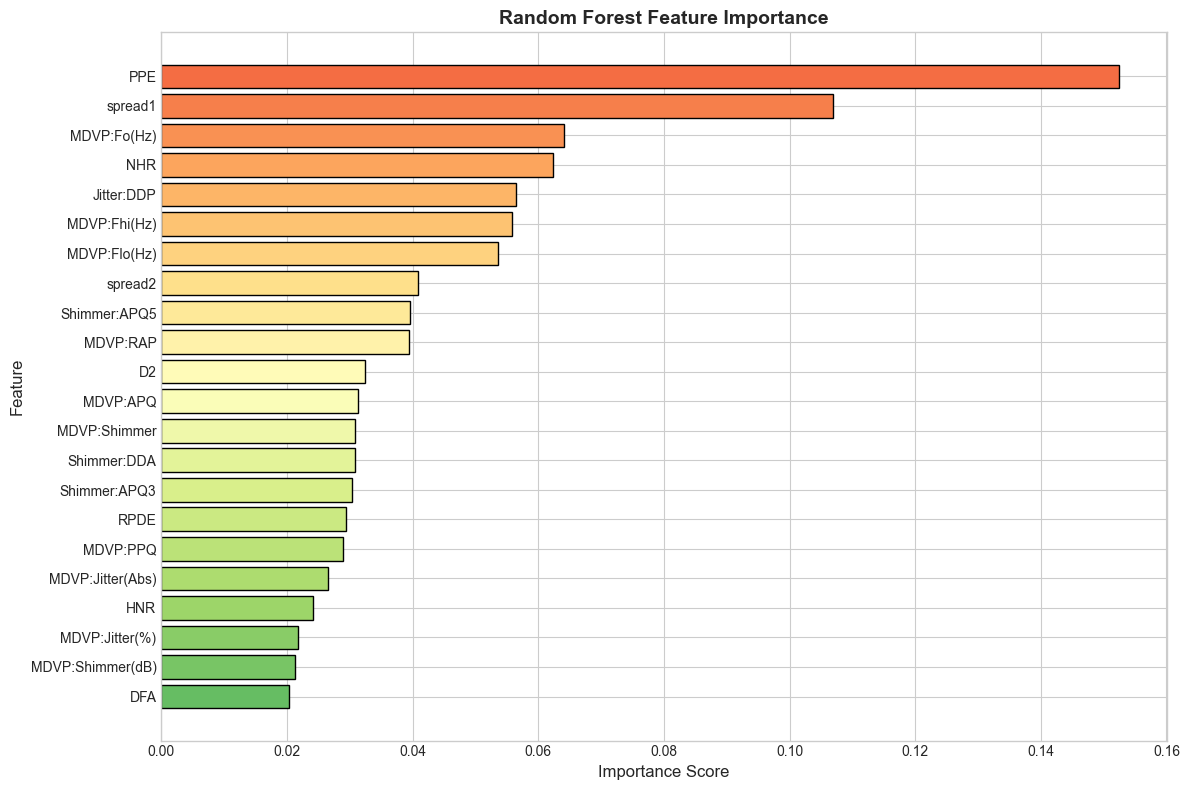

Figure saved: Model_04_feature_importance.png


In [18]:
# Visualize Feature Importance
plt.figure(figsize=(12, 8))

colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(feature_importance)))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors, edgecolor='black')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Random Forest Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('Model_04_feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: Model_04_feature_importance.png")

### 6.4 Gradient Boosting Classifier

In [19]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

print("Gradient Boosting Classifier:")
print("="*60)

# Create and train model
gb_model = GradientBoostingClassifier(
    n_estimators=100,      # Number of boosting stages (trees)
    learning_rate=0.1,     # How much each tree contributes
    max_depth=3,           # Depth of each tree
    random_state=42
)
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_gb = gb_model.predict(X_train_scaled)
y_test_pred_gb = gb_model.predict(X_test_scaled)
y_test_prob_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
train_acc_gb = accuracy_score(y_train, y_train_pred_gb)
test_acc_gb = accuracy_score(y_test, y_test_pred_gb)

print(f"Model Parameters:")
print(f"  - Number of estimators (trees): 100")
print(f"  - Learning rate: 0.1")
print(f"  - Max depth per tree: 3")
print(f"\nTraining Accuracy: {train_acc_gb*100:.2f}%")
print(f"Testing Accuracy: {test_acc_gb*100:.2f}%")
print(f"\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_gb, target_names=['Healthy', 'Parkinson\'s']))

Gradient Boosting Classifier:
Model Parameters:
  - Number of estimators (trees): 100
  - Learning rate: 0.1
  - Max depth per tree: 3

Training Accuracy: 100.00%
Testing Accuracy: 92.31%

Classification Report (Test Set):
              precision    recall  f1-score   support

     Healthy       0.82      0.90      0.86        10
 Parkinson's       0.96      0.93      0.95        29

    accuracy                           0.92        39
   macro avg       0.89      0.92      0.90        39
weighted avg       0.93      0.92      0.92        39



In [20]:
# Feature Importance from Gradient Boosting
gb_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance (Gradient Boosting):")
print("="*50)
print(gb_feature_importance.to_string(index=False))

Feature Importance (Gradient Boosting):
         Feature  Importance
             PPE    0.535771
     MDVP:Fo(Hz)    0.138054
            RPDE    0.051069
             NHR    0.041956
      Jitter:DDP    0.033347
              D2    0.032823
         spread1    0.026481
    MDVP:Fhi(Hz)    0.026260
         spread2    0.025778
    Shimmer:APQ5    0.021310
    Shimmer:APQ3    0.017846
        MDVP:PPQ    0.013142
MDVP:Shimmer(dB)    0.010197
    MDVP:Flo(Hz)    0.007010
     Shimmer:DDA    0.006818
        MDVP:APQ    0.004867
             HNR    0.001833
MDVP:Jitter(Abs)    0.001676
        MDVP:RAP    0.001484
             DFA    0.000854
  MDVP:Jitter(%)    0.000732
    MDVP:Shimmer    0.000692


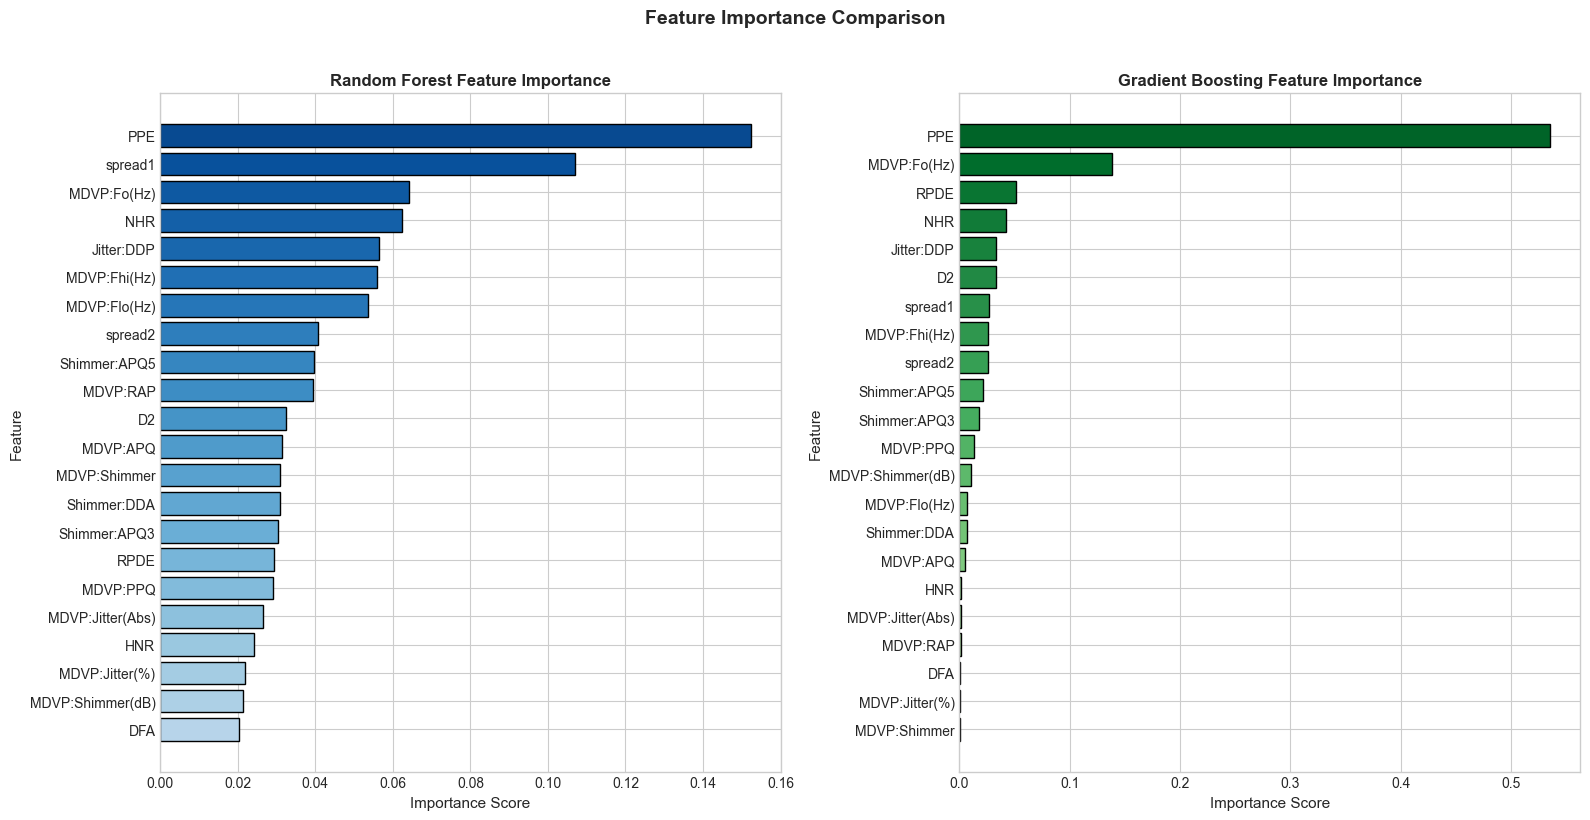

Figure saved: Model_04b_feature_importance_comparison.png


In [21]:
# Compare Feature Importance: Random Forest vs Gradient Boosting
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Random Forest Feature Importance
ax1 = axes[0]
rf_sorted = feature_importance.sort_values('Importance', ascending=True)
colors_rf = plt.cm.Blues(np.linspace(0.3, 0.9, len(rf_sorted)))
ax1.barh(rf_sorted['Feature'], rf_sorted['Importance'], color=colors_rf, edgecolor='black')
ax1.set_xlabel('Importance Score', fontsize=11)
ax1.set_ylabel('Feature', fontsize=11)
ax1.set_title('Random Forest Feature Importance', fontsize=12, fontweight='bold')

# Gradient Boosting Feature Importance
ax2 = axes[1]
gb_sorted = gb_feature_importance.sort_values('Importance', ascending=True)
colors_gb = plt.cm.Greens(np.linspace(0.3, 0.9, len(gb_sorted)))
ax2.barh(gb_sorted['Feature'], gb_sorted['Importance'], color=colors_gb, edgecolor='black')
ax2.set_xlabel('Importance Score', fontsize=11)
ax2.set_ylabel('Feature', fontsize=11)
ax2.set_title('Gradient Boosting Feature Importance', fontsize=12, fontweight='bold')

plt.suptitle('Feature Importance Comparison', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('Model_04b_feature_importance_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: Model_04b_feature_importance_comparison.png")

### 6.5 Model Comparison Summary

In [22]:
# Compare all classification models
print("Classification Model Comparison:")
print("="*70)

model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM (RBF)', 'Random Forest', 'Gradient Boosting'],
    'Train Accuracy': [train_acc_lr*100, svm_results['rbf']['train_acc']*100, train_acc_rf*100, train_acc_gb*100],
    'Test Accuracy': [test_acc_lr*100, svm_results['rbf']['test_acc']*100, test_acc_rf*100, test_acc_gb*100],
    'Precision': [
        precision_score(y_test, y_test_pred_lr)*100,
        precision_score(y_test, y_test_pred_svm)*100,
        precision_score(y_test, y_test_pred_rf)*100,
        precision_score(y_test, y_test_pred_gb)*100
    ],
    'Recall': [
        recall_score(y_test, y_test_pred_lr)*100,
        recall_score(y_test, y_test_pred_svm)*100,
        recall_score(y_test, y_test_pred_rf)*100,
        recall_score(y_test, y_test_pred_gb)*100
    ],
    'F1-Score': [
        f1_score(y_test, y_test_pred_lr)*100,
        f1_score(y_test, y_test_pred_svm)*100,
        f1_score(y_test, y_test_pred_rf)*100,
        f1_score(y_test, y_test_pred_gb)*100
    ]
})

print(model_comparison.round(2).to_string(index=False))

Classification Model Comparison:
              Model  Train Accuracy  Test Accuracy  Precision  Recall  F1-Score
Logistic Regression           86.54          92.31      93.33   96.55     94.92
          SVM (RBF)           89.10          92.31      90.62  100.00     95.08
      Random Forest          100.00          92.31      93.33   96.55     94.92
  Gradient Boosting          100.00          92.31      96.43   93.10     94.74


---
## 7. Model Evaluation Using Visualization
---

### 7.1 Confusion Matrices

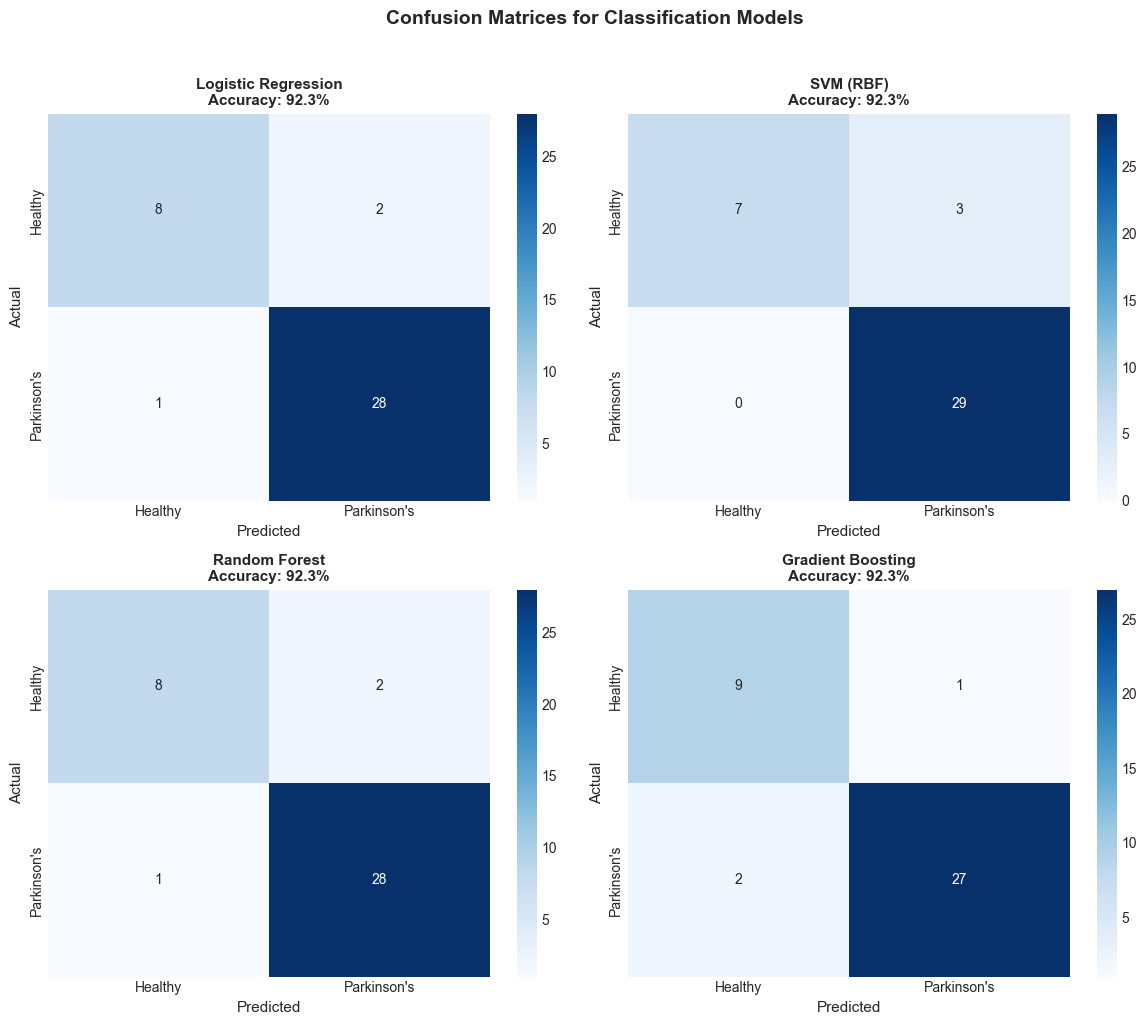

Figure saved: Model_05_confusion_matrices.png


In [23]:
# Plot confusion matrices for all models
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

models_pred = {
    'Logistic Regression': y_test_pred_lr,
    'SVM (RBF)': y_test_pred_svm,
    'Random Forest': y_test_pred_rf,
    'Gradient Boosting': y_test_pred_gb
}

for ax, (name, y_pred) in zip(axes, models_pred.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Healthy', 'Parkinson\'s'],
                yticklabels=['Healthy', 'Parkinson\'s'])
    ax.set_xlabel('Predicted', fontsize=11)
    ax.set_ylabel('Actual', fontsize=11)
    ax.set_title(f'{name}\nAccuracy: {accuracy_score(y_test, y_pred)*100:.1f}%', 
                 fontsize=11, fontweight='bold')

plt.suptitle('Confusion Matrices for Classification Models', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('Model_05_confusion_matrices.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: Model_05_confusion_matrices.png")

### 7.2 ROC Curves

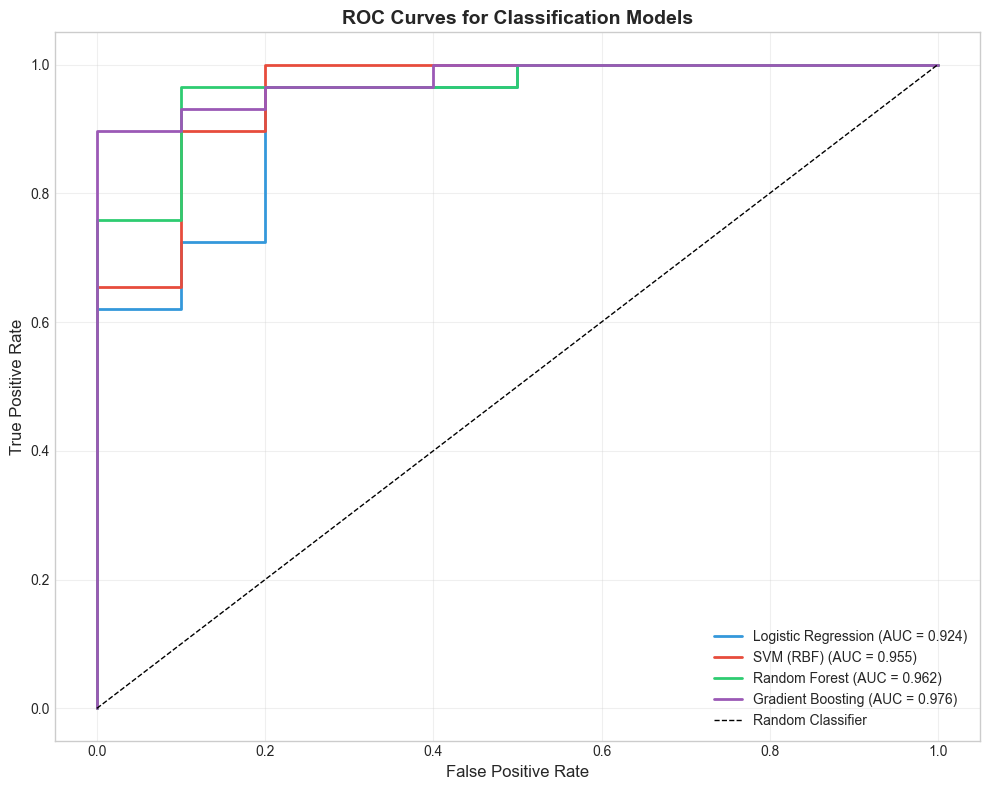

Figure saved: Model_06_roc_curves.png


In [24]:
# Plot ROC curves
plt.figure(figsize=(10, 8))

# Calculate ROC curves
models_prob = {
    'Logistic Regression': y_test_prob_lr,
    'SVM (RBF)': y_test_prob_svm,
    'Random Forest': y_test_prob_rf,
    'Gradient Boosting': y_test_prob_gb
}

colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']

for (name, y_prob), color in zip(models_prob.items(), colors):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, linewidth=2, label=f'{name} (AUC = {roc_auc:.3f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for Classification Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('Model_06_roc_curves.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: Model_06_roc_curves.png")

### 7.3 Model Accuracy Comparison

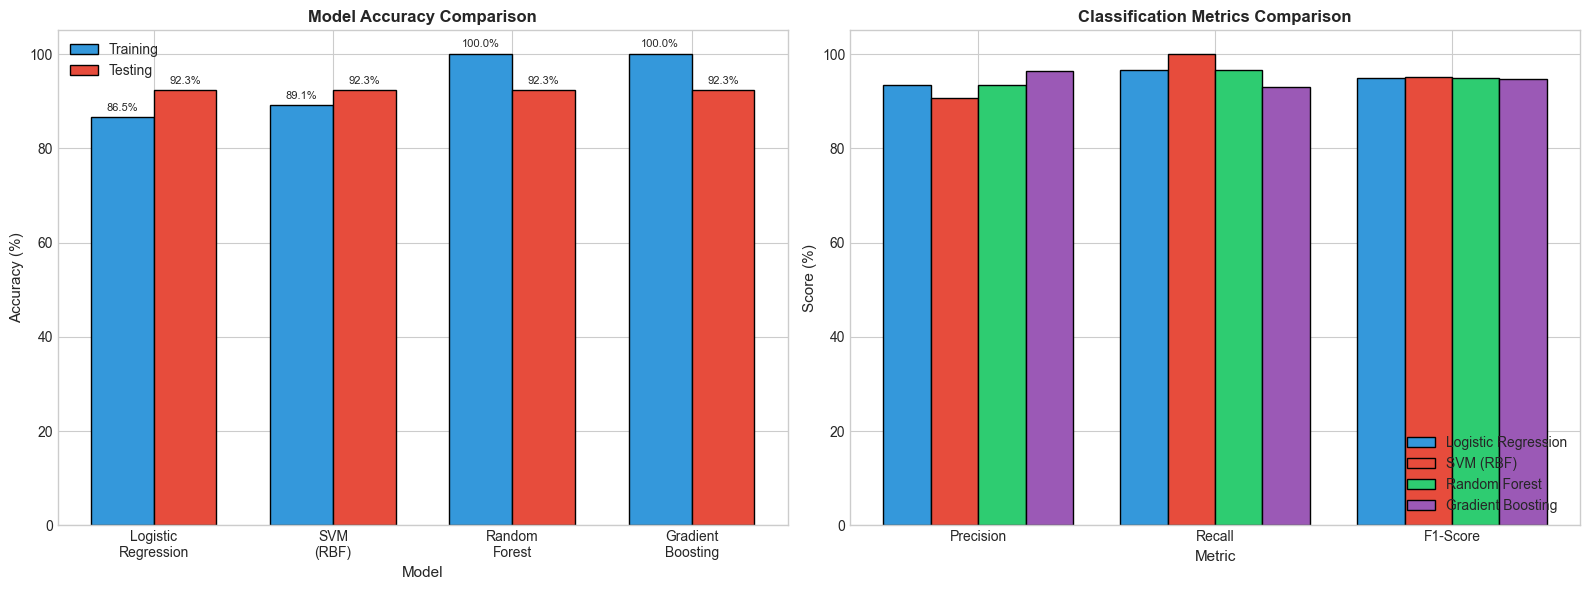

Figure saved: Model_07_accuracy_comparison.png


In [25]:
# Bar chart comparing model performance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Accuracy comparison
ax1 = axes[0]
models = ['Logistic\nRegression', 'SVM\n(RBF)', 'Random\nForest', 'Gradient\nBoosting']
train_accs = [train_acc_lr*100, svm_results['rbf']['train_acc']*100, train_acc_rf*100, train_acc_gb*100]
test_accs = [test_acc_lr*100, svm_results['rbf']['test_acc']*100, test_acc_rf*100, test_acc_gb*100]

x = np.arange(len(models))
width = 0.35

bars1 = ax1.bar(x - width/2, train_accs, width, label='Training', color='#3498db', edgecolor='black')
bars2 = ax1.bar(x + width/2, test_accs, width, label='Testing', color='#e74c3c', edgecolor='black')

ax1.set_xlabel('Model', fontsize=11)
ax1.set_ylabel('Accuracy (%)', fontsize=11)
ax1.set_title('Model Accuracy Comparison', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()
ax1.set_ylim(0, 105)

# Add value labels
for bar in bars1:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=8)
for bar in bars2:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=8)

# Plot 2: Multiple metrics comparison
ax2 = axes[1]
metrics = ['Precision', 'Recall', 'F1-Score']
lr_metrics = [precision_score(y_test, y_test_pred_lr)*100, 
              recall_score(y_test, y_test_pred_lr)*100,
              f1_score(y_test, y_test_pred_lr)*100]
svm_metrics = [precision_score(y_test, y_test_pred_svm)*100,
               recall_score(y_test, y_test_pred_svm)*100,
               f1_score(y_test, y_test_pred_svm)*100]
rf_metrics = [precision_score(y_test, y_test_pred_rf)*100,
              recall_score(y_test, y_test_pred_rf)*100,
              f1_score(y_test, y_test_pred_rf)*100]
gb_metrics = [precision_score(y_test, y_test_pred_gb)*100,
              recall_score(y_test, y_test_pred_gb)*100,
              f1_score(y_test, y_test_pred_gb)*100]

x = np.arange(len(metrics))
width = 0.2

ax2.bar(x - 1.5*width, lr_metrics, width, label='Logistic Regression', color='#3498db', edgecolor='black')
ax2.bar(x - 0.5*width, svm_metrics, width, label='SVM (RBF)', color='#e74c3c', edgecolor='black')
ax2.bar(x + 0.5*width, rf_metrics, width, label='Random Forest', color='#2ecc71', edgecolor='black')
ax2.bar(x + 1.5*width, gb_metrics, width, label='Gradient Boosting', color='#9b59b6', edgecolor='black')

ax2.set_xlabel('Metric', fontsize=11)
ax2.set_ylabel('Score (%)', fontsize=11)
ax2.set_title('Classification Metrics Comparison', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics)
ax2.legend(loc='lower right')
ax2.set_ylim(0, 105)

plt.tight_layout()
plt.savefig('Model_07_accuracy_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: Model_07_accuracy_comparison.png")

---
## 8. R-squared and MSE for In-Sample Evaluation
---

This section summarizes the R-squared and Mean Squared Error metrics for the regression models developed earlier.

In [26]:
# Summary of regression metrics
print("R-squared and MSE Summary for Regression Models:")
print("="*70)

regression_summary = pd.DataFrame({
    'Model': [
        'Simple Linear Regression',
        'Multiple Linear Regression',
        'Polynomial Regression (Best)',
        'Ridge Regression'
    ],
    'Train R²': [
        train_r2_simple,
        train_r2_multi,
        best_result['Train_R2'],
        pipeline_results['Ridge Regression']['Train_R2']
    ],
    'Test R²': [
        test_r2_simple,
        test_r2_multi,
        best_result['Test_R2'],
        pipeline_results['Ridge Regression']['Test_R2']
    ],
    'Train MSE': [
        train_mse_simple,
        train_mse_multi,
        best_result['Train_MSE'],
        pipeline_results['Ridge Regression']['Train_MSE']
    ],
    'Test MSE': [
        test_mse_simple,
        test_mse_multi,
        best_result['Test_MSE'],
        pipeline_results['Ridge Regression']['Test_MSE']
    ]
})

print(regression_summary.round(4).to_string(index=False))

R-squared and MSE Summary for Regression Models:
                       Model  Train R²  Test R²  Train MSE  Test MSE
    Simple Linear Regression    0.3268   0.2880     0.1240    0.1358
  Multiple Linear Regression    0.4769   0.4907     0.0964    0.0971
Polynomial Regression (Best)    0.4263   0.4511     0.1057    0.1047
            Ridge Regression    0.4674   0.4535     0.0981    0.1042


In [27]:
# Interpretation of R-squared
print("\nInterpretation of R-squared Values:")
print("="*60)
print("""
R-squared (R²) represents the proportion of variance in the target
variable that is explained by the model.

- R² = 1.0: Perfect fit (model explains 100% of variance)
- R² = 0.5: Model explains 50% of variance
- R² = 0.0: Model explains none of the variance

For our models:
""")
print(f"- Simple Linear Regression explains {test_r2_simple*100:.1f}% of variance")
print(f"- Multiple Linear Regression explains {test_r2_multi*100:.1f}% of variance")
print(f"\nThe improvement from simple to multiple regression demonstrates")
print(f"that using all features provides better predictive power.")


Interpretation of R-squared Values:

R-squared (R²) represents the proportion of variance in the target
variable that is explained by the model.

- R² = 1.0: Perfect fit (model explains 100% of variance)
- R² = 0.5: Model explains 50% of variance
- R² = 0.0: Model explains none of the variance

For our models:

- Simple Linear Regression explains 28.8% of variance
- Multiple Linear Regression explains 49.1% of variance

The improvement from simple to multiple regression demonstrates
that using all features provides better predictive power.


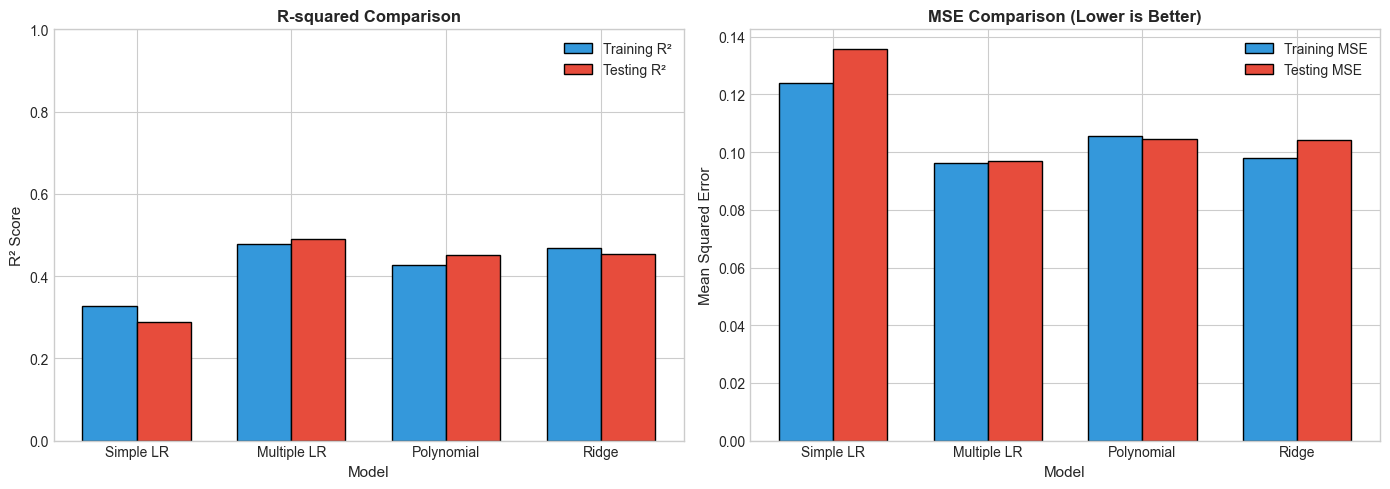

Figure saved: Model_08_r2_mse_comparison.png


In [28]:
# Visualize R² and MSE comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: R² comparison
ax1 = axes[0]
models = ['Simple LR', 'Multiple LR', 'Polynomial', 'Ridge']
train_r2 = [train_r2_simple, train_r2_multi, best_result['Train_R2'], 
            pipeline_results['Ridge Regression']['Train_R2']]
test_r2 = [test_r2_simple, test_r2_multi, best_result['Test_R2'],
           pipeline_results['Ridge Regression']['Test_R2']]

x = np.arange(len(models))
width = 0.35

ax1.bar(x - width/2, train_r2, width, label='Training R²', color='#3498db', edgecolor='black')
ax1.bar(x + width/2, test_r2, width, label='Testing R²', color='#e74c3c', edgecolor='black')

ax1.set_xlabel('Model', fontsize=11)
ax1.set_ylabel('R² Score', fontsize=11)
ax1.set_title('R-squared Comparison', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()
ax1.set_ylim(0, 1)

# Plot 2: MSE comparison
ax2 = axes[1]
train_mse = [train_mse_simple, train_mse_multi, best_result['Train_MSE'],
             pipeline_results['Ridge Regression']['Train_MSE']]
test_mse = [test_mse_simple, test_mse_multi, best_result['Test_MSE'],
            pipeline_results['Ridge Regression']['Test_MSE']]

ax2.bar(x - width/2, train_mse, width, label='Training MSE', color='#3498db', edgecolor='black')
ax2.bar(x + width/2, test_mse, width, label='Testing MSE', color='#e74c3c', edgecolor='black')

ax2.set_xlabel('Model', fontsize=11)
ax2.set_ylabel('Mean Squared Error', fontsize=11)
ax2.set_title('MSE Comparison (Lower is Better)', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(models)
ax2.legend()

plt.tight_layout()
plt.savefig('Model_08_r2_mse_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: Model_08_r2_mse_comparison.png")

---
## 9. Prediction and Decision Making
---

This section demonstrates how the trained models can be used to make predictions on new data and support clinical decision-making.

In [29]:
# Select the best performing model for predictions
print("Model Selection for Prediction:")
print("="*60)

# Based on test accuracy, select the best model
model_accuracies = {
    'Logistic Regression': test_acc_lr,
    'SVM (RBF)': svm_results['rbf']['test_acc'],
    'Random Forest': test_acc_rf,
    'Gradient Boosting': test_acc_gb
}

best_model_name = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model_name]

print(f"Best performing model: {best_model_name}")
print(f"Test Accuracy: {best_accuracy*100:.2f}%")

# Select the best model object
if best_model_name == 'Logistic Regression':
    best_model = log_reg
elif best_model_name == 'SVM (RBF)':
    best_model = best_svm
elif best_model_name == 'Random Forest':
    best_model = rf_model
else:
    best_model = gb_model

Model Selection for Prediction:
Best performing model: Logistic Regression
Test Accuracy: 92.31%


In [30]:
# Demonstrate prediction on test samples
print("\nSample Predictions:")
print("="*70)

# Select 10 random samples from test set
np.random.seed(42)
sample_indices = np.random.choice(len(X_test_scaled), size=10, replace=False)

sample_X = X_test_scaled.iloc[sample_indices]
sample_y_actual = y_test.iloc[sample_indices]

# Make predictions
sample_predictions = best_model.predict(sample_X)
sample_probabilities = best_model.predict_proba(sample_X)[:, 1]

# Create results table
prediction_results = pd.DataFrame({
    'Sample': range(1, 11),
    'Actual': ['Parkinson\'s' if y == 1 else 'Healthy' for y in sample_y_actual.values],
    'Predicted': ['Parkinson\'s' if p == 1 else 'Healthy' for p in sample_predictions],
    'Probability': [f'{prob*100:.1f}%' for prob in sample_probabilities],
    'Correct': ['Yes' if a == p else 'No' for a, p in zip(sample_y_actual.values, sample_predictions)]
})

print(prediction_results.to_string(index=False))
print(f"\nAccuracy on these samples: {sum(sample_y_actual.values == sample_predictions)/10*100:.0f}%")


Sample Predictions:
 Sample      Actual   Predicted Probability Correct
      1 Parkinson's Parkinson's       61.3%     Yes
      2 Parkinson's Parkinson's       86.1%     Yes
      3     Healthy     Healthy       24.9%     Yes
      4 Parkinson's     Healthy       32.3%      No
      5 Parkinson's Parkinson's       76.9%     Yes
      6 Parkinson's Parkinson's       92.6%     Yes
      7 Parkinson's Parkinson's       75.5%     Yes
      8 Parkinson's Parkinson's       80.8%     Yes
      9 Parkinson's Parkinson's       98.4%     Yes
     10 Parkinson's Parkinson's       99.5%     Yes

Accuracy on these samples: 90%


In [31]:
# Clinical Decision Support Example
print("\nClinical Decision Support Example:")
print("="*70)

# Simulate a new patient's voice measurements
print("\nScenario: A new patient's voice measurements are recorded.")
print("The model analyzes these measurements to support diagnosis.")

# Use a sample from test set as "new patient"
new_patient_idx = sample_indices[0]
new_patient_data = X_test_scaled.iloc[[new_patient_idx]]
new_patient_actual = y_test.iloc[new_patient_idx]

# Make prediction
prediction = best_model.predict(new_patient_data)[0]
probability = best_model.predict_proba(new_patient_data)[0]

print(f"\nModel Prediction:")
print(f"  - Classification: {'Parkinson\'s Disease' if prediction == 1 else 'Healthy'}")
print(f"  - Confidence: {max(probability)*100:.1f}%")
print(f"  - Probability of Parkinson's: {probability[1]*100:.1f}%")
print(f"  - Probability of Healthy: {probability[0]*100:.1f}%")

print(f"\nActual Status: {'Parkinson\'s Disease' if new_patient_actual == 1 else 'Healthy'}")

print("\nClinical Recommendation:")
if probability[1] > 0.7:
    print("  HIGH RISK - Strong indicators of Parkinson's disease.")
    print("  Recommend comprehensive neurological examination.")
elif probability[1] > 0.4:
    print("  MODERATE RISK - Some indicators present.")
    print("  Recommend follow-up assessment and monitoring.")
else:
    print("  LOW RISK - Indicators suggest healthy status.")
    print("  Recommend routine monitoring.")


Clinical Decision Support Example:

Scenario: A new patient's voice measurements are recorded.
The model analyzes these measurements to support diagnosis.

Model Prediction:
  - Classification: Parkinson's Disease
  - Confidence: 61.3%
  - Probability of Parkinson's: 61.3%
  - Probability of Healthy: 38.7%

Actual Status: Parkinson's Disease

Clinical Recommendation:
  MODERATE RISK - Some indicators present.
  Recommend follow-up assessment and monitoring.


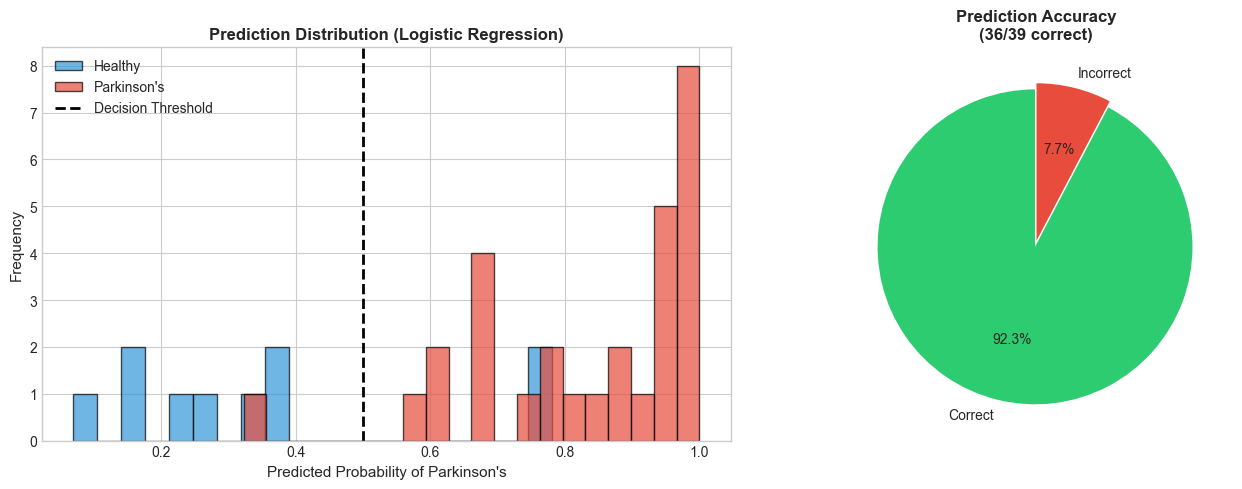

Figure saved: Model_09_prediction_analysis.png


In [32]:
# Visualize prediction results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Prediction distribution on test set
ax1 = axes[0]
y_test_prob_best = best_model.predict_proba(X_test_scaled)[:, 1]

ax1.hist(y_test_prob_best[y_test == 0], bins=20, alpha=0.7, label='Healthy', color='#3498db', edgecolor='black')
ax1.hist(y_test_prob_best[y_test == 1], bins=20, alpha=0.7, label='Parkinson\'s', color='#e74c3c', edgecolor='black')
ax1.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Decision Threshold')

ax1.set_xlabel('Predicted Probability of Parkinson\'s', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title(f'Prediction Distribution ({best_model_name})', fontsize=12, fontweight='bold')
ax1.legend()

# Plot 2: Correct vs Incorrect predictions
ax2 = axes[1]
y_test_pred_best = best_model.predict(X_test_scaled)
correct = sum(y_test == y_test_pred_best)
incorrect = len(y_test) - correct

ax2.pie([correct, incorrect], labels=['Correct', 'Incorrect'], 
        autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'],
        explode=[0.02, 0.02], shadow=False, startangle=90)
ax2.set_title(f'Prediction Accuracy\n({correct}/{len(y_test)} correct)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('Model_09_prediction_analysis.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: Model_09_prediction_analysis.png")

---
## 10. Summary and Conclusion
---

In [33]:
print("="*70)
print("                    PROGRESS 4 SUMMARY")
print("="*70)

print("""
1. DATA PREPARATION
   - Dataset split: 80% training, 20% testing
   - Feature scaling applied using StandardScaler
   - Stratified split maintains class distribution

2. REGRESSION ANALYSIS
   - Simple Linear Regression: Single feature (spread1)
   - Multiple Linear Regression: All 22 features
   - Polynomial Regression: Tested degrees 1-5
   - Ridge Regression: With regularization
""")

print(f"   Best Regression Model: Multiple Linear Regression")
print(f"   Test R-squared: {test_r2_multi:.4f}")
print(f"   Test MSE: {test_mse_multi:.4f}")

print("""
3. CLASSIFICATION MODELS DEVELOPED
   - Logistic Regression
   - Support Vector Machine (Linear, RBF, Polynomial kernels)
   - Random Forest Classifier
   - Gradient Boosting Classifier
""")

print(f"   Best Classification Model: {best_model_name}")
print(f"   Test Accuracy: {best_accuracy*100:.2f}%")

print("""
4. KEY FINDINGS
   - Multiple features provide better prediction than single features
   - Most important features: PPE, spread1, MDVP:Fo(Hz)
   - Classification models achieve good accuracy for disease detection
   - Model can support clinical decision-making

5. VISUALIZATIONS GENERATED
   - Model_01_simple_linear_regression.png
   - Model_02_multiple_linear_regression.png
   - Model_03_polynomial_regression.png
   - Model_04_feature_importance.png
   - Model_05_confusion_matrices.png
   - Model_06_roc_curves.png
   - Model_07_accuracy_comparison.png
   - Model_08_r2_mse_comparison.png
   - Model_09_prediction_analysis.png

6. NEXT STEPS (Progress 5)
   - Model evaluation and refinement
   - Cross-validation
   - Hyperparameter tuning (Grid Search)
   - Addressing overfitting/underfitting
   - Final model selection
""")

print("="*70)
print("                    END OF PROGRESS 4")
print("="*70)

                    PROGRESS 4 SUMMARY

1. DATA PREPARATION
   - Dataset split: 80% training, 20% testing
   - Feature scaling applied using StandardScaler
   - Stratified split maintains class distribution

2. REGRESSION ANALYSIS
   - Simple Linear Regression: Single feature (spread1)
   - Multiple Linear Regression: All 22 features
   - Polynomial Regression: Tested degrees 1-5
   - Ridge Regression: With regularization

   Best Regression Model: Multiple Linear Regression
   Test R-squared: 0.4907
   Test MSE: 0.0971

3. CLASSIFICATION MODELS DEVELOPED
   - Logistic Regression
   - Support Vector Machine (Linear, RBF, Polynomial kernels)
   - Random Forest Classifier
   - Gradient Boosting Classifier

   Best Classification Model: Logistic Regression
   Test Accuracy: 92.31%

4. KEY FINDINGS
   - Multiple features provide better prediction than single features
   - Most important features: PPE, spread1, MDVP:Fo(Hz)
   - Classification models achieve good accuracy for disease detecti